Regression of housing prices in Boston

In [3]:
import pandas as pd
df = pd.read_csv('data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       491 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# having many rows, drop the rows containing missing values
df.dropna(inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#1 Linear regression of the housing price (MEDV)

In [6]:
# split data
# here MEDV refers to the median value of housing price in $1,000, which will be treated as a target value
train = df.iloc[:,0:13]
target = df[['MEDV']]

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train, target, test_size=0.3, random_state=42)

print(train.shape)
print(train_input.shape, test_input.shape)

(491, 13)
(343, 13) (148, 13)


In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target), lr.score(test_input, test_target))

0.7381618458803759 0.7318079210246159


In [9]:
test_predict = lr.predict(test_input)

# evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_target, test_predict)
mse

20.81188458031761

In [10]:
from sklearn.metrics import r2_score
r2 = r2_score(test_target, test_predict)
r2

0.7318079210246159

In [12]:
# try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
rr.fit(train_input, train_target)
print(rr.score(train_input, train_target), rr.score(test_input, test_target))

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9742518343212461 0.8344503583860036


In [13]:
test_predict = rr.predict(test_input)

mse = mean_squared_error(test_target, test_predict)
r2 = r2_score(test_target, test_predict)

print(mse, r2)

12.846762837837852 0.8344503583860036


#2 Pytorch MPL for regression

In [21]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

model = nn.Sequential(
    nn.Linear(13,50),
    nn.ReLU(),
    nn.Linear(50,1)
)

batch_size = 20
learning_rate = 0.001

adam = Adam(model.parameters(), lr=learning_rate)

loss_arr = []

for epoch in range(1000):
    # repeat batches
    for batch in range(len(train)//batch_size):
        start = batch+batch_size
        end = start + batch_size

        train_val = train.values
        target_val = target.values

        # transfrom to torch.FloatTensor
        train_tensor = torch.FloatTensor(train_val[start:end])
        target_tensor = torch.FloatTensor(target_val[start:end])

        adam.zero_grad() # initialize the gradient of an weight
        target_predicted = model(train_tensor)
        loss = nn.MSELoss()(target_tensor, target_predicted)
        loss.backward()
        adam.step()

    if epoch % 50 == 0:
        loss_arr.append(loss.item())
        print(f'At epoch #{epoch}, loss : {loss.item()}')

At epoch #0, loss : 63.5999755859375
At epoch #50, loss : 7.915493965148926
At epoch #100, loss : 4.4157023429870605
At epoch #150, loss : 2.883910655975342
At epoch #200, loss : 2.18082594871521
At epoch #250, loss : 1.78558349609375
At epoch #300, loss : 1.3494504690170288
At epoch #350, loss : 1.0691272020339966
At epoch #400, loss : 0.8736224174499512
At epoch #450, loss : 0.7770681977272034
At epoch #500, loss : 0.6910125613212585
At epoch #550, loss : 0.6405853033065796
At epoch #600, loss : 0.5685718655586243
At epoch #650, loss : 0.5283454060554504
At epoch #700, loss : 0.5321816205978394
At epoch #750, loss : 0.5160319209098816
At epoch #800, loss : 0.5117862224578857
At epoch #850, loss : 0.49350181221961975
At epoch #900, loss : 0.4853307604789734
At epoch #950, loss : 0.49902787804603577


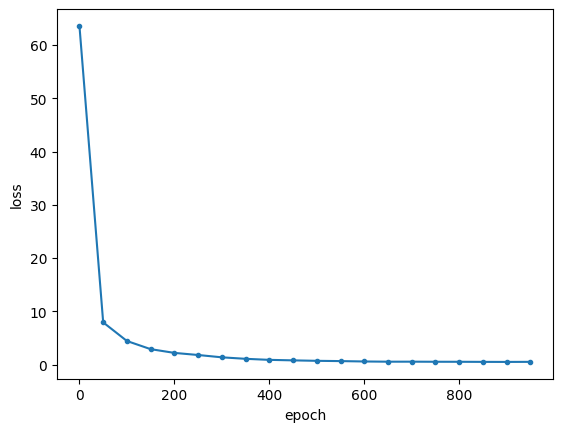

In [24]:
import matplotlib.pyplot as plt
plt.plot([50*i for i in range(len(loss_arr))],loss_arr, '.-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#3 Tensorflow MPL for regression